# Comparing Rcut Local and Global

- Calculates the rcut global and local(for one atom)
- Compares histogram of rcut values

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate as interp
from scipy import integrate

import ase
from ase.calculators import lj
from ase import build

from ase.md.verlet import VelocityVerlet
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase.io.trajectory import Trajectory

import atombond



In [2]:
import importlib
importlib.reload(atombond)

<module 'atombond' from 'C:\\Users\\AJoiner\\Documents\\Atomic-Bonding\\atombond.py'>

In [3]:
%matplotlib inline

In [7]:
Nx = 5
liq_at = atombond.get_lj_fcc_struc(super_a=[Nx,Nx,Nx],dNN=1.2,E_lj=1/40)
print(liq_at)

Atoms(symbols='X500', pbc=[True, True, True], cell=[8.48528137423857, 8.48528137423857, 8.48528137423857], positions=..., calculator=LennardJones(...))


In [8]:
Nat = liq_at.get_number_of_atoms()
Vat = liq_at.get_volume()
Lat = (Vat)**(1/3)
rhoat = Nat/Vat
print(Lat, Vat)
np.sort(liq_at.positions)

8.48528137424 610.940258945


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.84852814,  0.84852814],
       [ 0.        ,  0.84852814,  0.84852814],
       ..., 
       [ 6.7882251 ,  7.63675324,  7.63675324],
       [ 6.7882251 ,  7.63675324,  7.63675324],
       [ 6.7882251 ,  7.63675324,  7.63675324]])

In [4]:
traj_filenm = 'lj_rho0.82_T600_N500.traj'
traj = Trajectory(traj_filenm)

In [5]:
atoms=traj[-1]
Vtot = atoms.get_volume()
print(Vtot)
dist_a=atoms.get_all_distances(mic=True)
dists_a = np.sort(dist_a)

610.940258945


In [9]:

pdf_approx_grid_a = []
#print(dists_a.shape)

for ind in np.arange(dists_a.shape[0]):
    ipdf_a, sampdist_a = atombond.approx_pdf_kde(dists_a[ind],rhoat)
    pdf_approx_grid_a.append(ipdf_a)
    
pdf_approx_grid_a = np.array(pdf_approx_grid_a)
    
#print(ipdf_a,sampdist_a)
#print(pdf_approx_grid_a.shape)
print(pdf_approx_grid_a)

[[ 0.          0.          0.         ...,  1.00503716  1.00410012
   1.00303243]
 [ 0.          0.          0.         ...,  0.92092712  0.91854232
   0.9161446 ]
 [ 0.          0.          0.         ...,  1.0259304   1.02285457
   1.01964145]
 ..., 
 [ 0.          0.          0.         ...,  0.99171178  0.99283783
   0.9939314 ]
 [ 0.          0.          0.         ...,  0.88854189  0.88714345
   0.88580912]
 [ 0.          0.          0.         ...,  0.95576372  0.95589404
   0.95602793]]


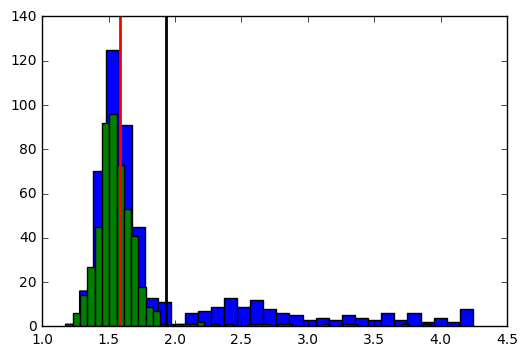

In [10]:
#rcut_global_a =[]
#rcut_local_a =[]
#for ind in np.arange(pdf_approx_grid_a.shape[0]):
#    pdf_a = pdf_approx_grid_a[ind]
#    rcut_global_a.append(calc_rcut_global(pdf_a,sampdist_a))
#    rcut_local_a.append(calc_rcut_local(pdf_a,sampdist_a))
    
#rcut_global_a = np.array(rcut_global_a)
#rcut_local_a = np.array(rcut_local_a)

#for pdf_a in pdf_approx_grid_a:
    
Natom = 500 #pdf_approx_grid_a.shape[0]
rcut_global_a = np.zeros(Natom)
rcut_local_a = np.zeros(Natom)
    
for ind, pdf_a in enumerate(pdf_approx_grid_a):
    rcut_global_a[ind] = atombond.calc_rcut_global(pdf_a,sampdist_a)
    rcut_local_a[ind] = atombond.calc_rcut_local(pdf_a,sampdist_a)
    

plt.hist(rcut_global_a, 30)
plt.hist(rcut_local_a, 50)
plt.axvline(x=np.mean(rcut_global_a),ymin=0,ymax=140,linewidth=2,color='k')
plt.axvline(x=np.mean(rcut_local_a),ymin=0,ymax=140,linewidth=2,color='r')